# 全国新型コロナウイルスデータ



## jsonデータを読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

pcr = pd.read_csv('./PCR.csv')
data = pd.read_csv('./COVID-19.csv')
data_pcr = pd.merge(pcr, data, right_on='確定日',left_on='年月日')
data.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,更新日時,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,3/23/2020 21:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 50 columns):
通し                  1129 non-null int64
厚労省NO               1040 non-null object
無症状病原体保有者           111 non-null object
国内                  302 non-null object
チャーター便              11 non-null object
年代                  1129 non-null object
性別                  1129 non-null object
確定日                 1129 non-null object
発症日                 896 non-null object
受診都道府県              1129 non-null object
居住都道府県              1129 non-null object
居住管内                84 non-null object
居住市区町村              741 non-null object
キー                  1129 non-null object
発表                  1129 non-null object
ステータス               73 non-null object
備考                  230 non-null object
ソース                 1039 non-null object
ソース2                957 non-null object
ソース3                184 non-null object
人数                  1129 non-null int64
累計                  54 non-null float64
前日比    

## 症状別累計人数

In [3]:
total = data["累計"].iloc[-1]
d = data["死者合計"].dropna().iloc[-1]
di = data["退院数累計"].dropna().iloc[-1]
print(data["確定日"].iloc[-1],"現在データ")
print('全国の新型コロナウイルス感染者はトータル:',total,'死者合計:',d,'累計退院者数:',di)
print('死亡確率：{}%'.format((d/total)*100),'退院率：{}%'.format((di/total)*100))

3/23/2020 現在データ
全国の新型コロナウイルス感染者はトータル: 1129.0 死者合計: 41.0 累計退院者数: 285.0
死亡確率：3.631532329495128% 退院率：25.243578387953942%


## 日別PCR検査数
厚生労働省の発表資料より

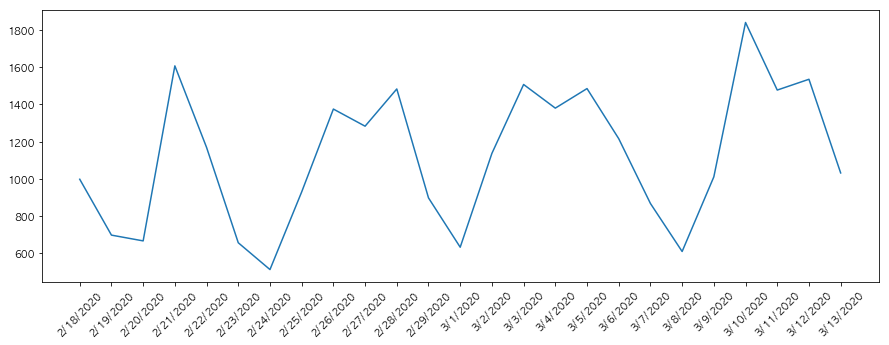

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['数'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 累計PCR検査数

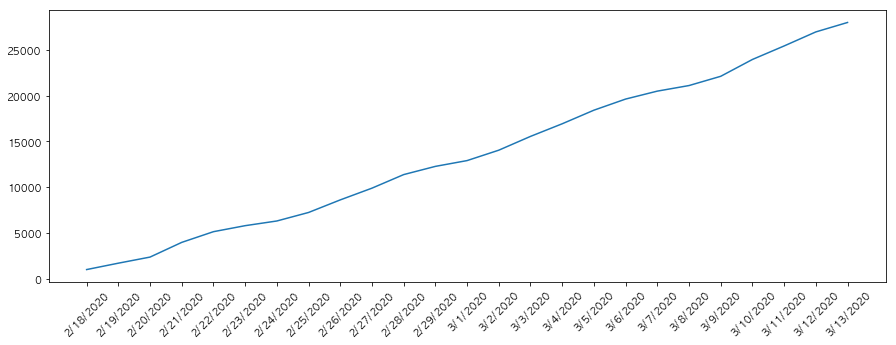

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['PCR累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 日別感染者累計

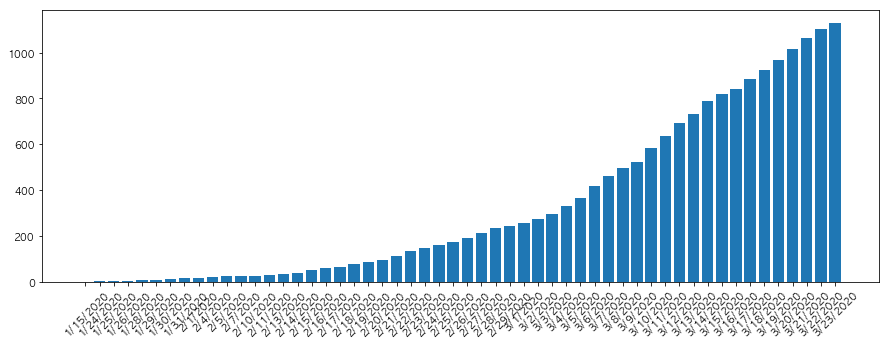

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(data['確定日'],data['累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);


## 死亡者推移

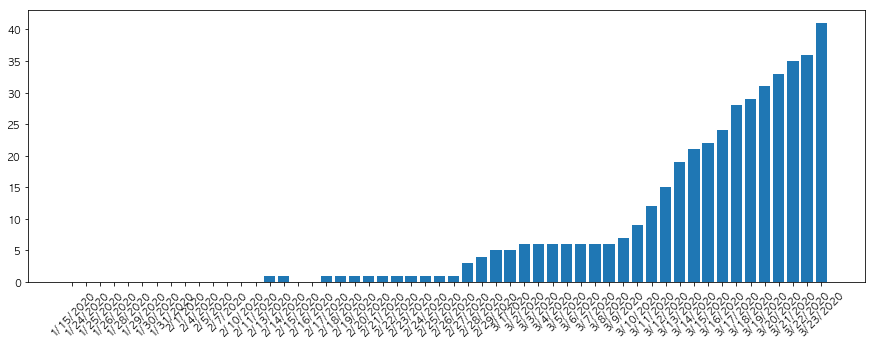

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(data['確定日'],data["死者合計"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 年代別感染者数割合

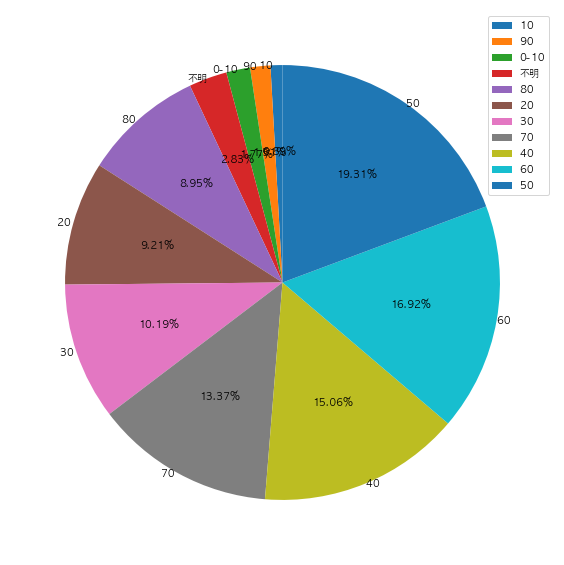

In [8]:
x = data['年代'].value_counts(ascending=True)
label_index = data['年代'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

## 性別感染者数割合

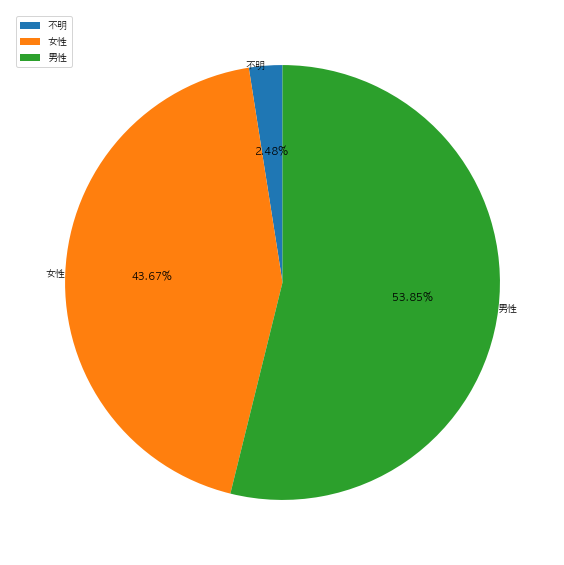

In [9]:
x = data['性別'].value_counts(ascending=True)
label_index = data['性別'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

### 県別累計データ

In [10]:
grouped = data['人数'].groupby(data['居住都道府県'])
total_pref = grouped.sum()
total_pref = total_pref.sort_values(ascending=False) 
total_pref = pd.DataFrame(total_pref)
total_pref

,人数
居住都道府県,
北海道,160
東京都,155
愛知県,144
大阪府,138
兵庫県,110
神奈川県,79
埼玉県,56
千葉県,39
新潟県,26


In [11]:
location_data = pd.read_csv('./location.csv')
location_data.head()

,都道府県名,緯度,経度
0,北海道,43.06417,141.34694
1,青森県,40.82444,140.74000
2,岩手県,39.70361,141.15250
3,宮城県,38.26889,140.87194
4,秋田県,39.71861,140.10250


### locationデータと感染者数をマージ

In [12]:
pref_data = pd.merge(total_pref, location_data, left_on='居住都道府県', right_on='都道府県名', how='outer')
pref_data['人数'] = pref_data['人数'].fillna(0)
pref_data = pref_data.dropna(subset=['都道府県名'])
pref_data

,人数,都道府県名,緯度,経度
0,160.0,北海道,43.06417,141.34694
1,155.0,東京都,35.68944,139.69167
2,144.0,愛知県,35.18028,136.90667
3,138.0,大阪府,34.68639,135.52000
4,110.0,兵庫県,34.69139,135.18306
5,79.0,神奈川県,35.44778,139.64250
6,56.0,埼玉県,35.85694,139.64889
7,39.0,千葉県,35.60472,140.12333
8,26.0,新潟県,37.90222,139.02361
9,23.0,京都府,35.02139,135.75556


In [13]:
pref_data_dic = pref_data.to_dict(orient='index')
states = tuple(pref_data_dic.values())

## 県別感染者数Map表示
Map表示はGitHubではできませんので、次のリンクから確認ください。

[県別感染者数Map](https://haidoro.github.io/covid_japan/)

In [14]:
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[35.684479, 139.747977], zoom_start=5)


# 円の大きさをわかりやすくするための重み
WEIGHT = 0.01

for state in states:
    folium.CircleMarker(
            [state['緯度'], state['経度']],
            radius=state['人数'] + WEIGHT,
            popup=state['都道府県名'],
            color='#3186cc',
            fill_color='#3186cc',
    ).add_to(map_)


map_.save('index.html')
map_
